In [1]:
# Part 1 - Question A
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set()
import math

In [19]:
# Part 1 - Question B
data_raw = pd.read_csv('data.csv')
data_raw

C:\Users\tanis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682149,2019112500,20191125003789,home,69.58,31.33,4.19,1.33,0.43,92.32,20.94,...,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682150,2019112500,20191125003789,home,72.16,25.09,1.01,1.40,0.08,65.83,76.48,...,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682151,2019112500,20191125003789,home,72.23,31.95,1.75,0.68,0.17,93.99,90.26,...,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682152,2019112500,20191125003789,home,72.08,26.74,0.70,1.59,0.07,61.47,48.34,...,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW


In [20]:
data_raw.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

In [21]:
data_raw['Season']

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
682149    2019
682150    2019
682151    2019
682152    2019
682153    2019
Name: Season, Length: 682154, dtype: int64

In [3]:
#Part 2 - Question A
play_id_20181115001638 = data_raw[(data_raw['PlayId'] == 20181115001638)]
play_id_20181115001638

"""
Stadium Type, Turf, Temperature, Humidity, etc. all have the same values for all the 22 rows and each describe a certain element
of the play. 

Orientation, X, Y, S, A, etc. all tell stats about the player specifically.
"""

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
404426,2018111500,20181115001638,away,88.30,30.41,3.76,3.01,0.39,265.47,233.93,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South
404427,2018111500,20181115001638,away,90.99,26.82,3.63,0.96,0.35,315.67,339.90,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South
404428,2018111500,20181115001638,away,93.24,28.22,5.06,0.79,0.50,175.16,118.46,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South
404429,2018111500,20181115001638,away,89.15,28.82,2.15,1.57,0.19,197.42,207.64,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South
404430,2018111500,20181115001638,away,90.09,24.84,0.83,0.83,0.07,247.78,192.83,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South
404431,2018111500,20181115001638,away,89.83,27.85,0.36,0.49,0.04,319.86,341.48,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South
404432,2018111500,20181115001638,away,88.91,36.08,4.30,3.37,0.41,268.52,247.79,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South
404433,2018111500,20181115001638,away,88.36,27.93,2.50,1.41,0.27,157.72,210.53,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South
404434,2018111500,20181115001638,away,94.68,27.45,4.94,3.72,0.48,226.71,232.04,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South
404435,2018111500,20181115001638,away,89.06,41.96,3.75,2.54,0.37,258.48,287.47,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South


In [4]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12*2, 6.33*2)):
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

def plot_play(play_id, train_df=data_raw):
    def get_dx_dy(angle, dist):
        cartesianAngleRadians = (450-angle)*math.pi/180.0
        dx = dist * math.cos(cartesianAngleRadians)
        dy = dist * math.sin(cartesianAngleRadians)
        return dx, dy

    fig, ax = create_football_field()
    train_df.query("PlayId == @play_id and Team == 'away'") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='orange', s=50, legend='Away')
    train_df.query("PlayId == @play_id and Team == 'home'") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='blue', s=50, legend='Home')
    train_df.query("PlayId == @play_id and NflIdRusher == NflId") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='red', s=100, legend='Rusher')
    rusher_row = train_df.query("PlayId == @play_id and NflIdRusher == NflId")
    yards_covered = rusher_row["Yards"].values[0]

    x = rusher_row["X"].values[0]
    y = rusher_row["Y"].values[0]
    rusher_dir = rusher_row["Dir"].values[0]
    rusher_orientation = rusher_row["Orientation"].values[0]
    rusher_speed = rusher_row["S"].values[0]
    dx, dy = get_dx_dy(rusher_dir, rusher_speed)
    dx_o, dy_o = get_dx_dy(rusher_orientation, rusher_speed/2)

    ax.arrow(x, y, dx, dy, length_includes_head=True, width=0.3)
    ax.arrow(x, y, dx_o, dy_o, length_includes_head=True, width=0.3, color="yellow")
    plt.title(f'Play # {play_id} and yard gain is {yards_covered}', fontsize=20)
    plt.show()

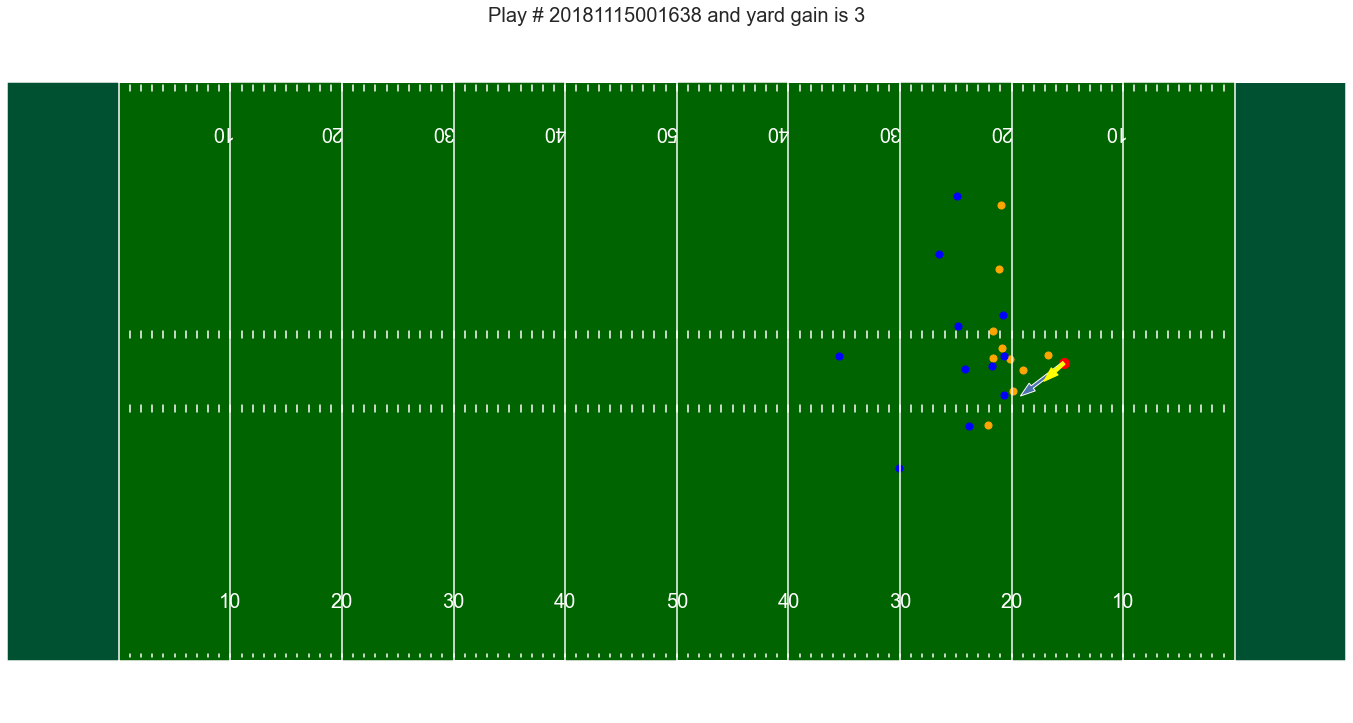

'\nQuestion 2 Part B\n\nAppears that the offense is going left down the field at an angle.\n'

In [13]:
# how to use these two functions (one calls the other)
plot_play(play_id=20181115001638, train_df=data_raw)

"""
Question 2 Part B

Appears that the offense is going left down the field at an angle. The rusher appears to be looking in a similar direction
to where they run. Based on my knowledge of the game of football, it appears the offense is in orange and the defense 
is in blue. The offense seems to be clustered around the rusher, wheile the defense appears to be more spead out in order
to cover all the different directions the rusher could go.
"""

In [23]:
#player = data_raw[(data_raw['PlayId'] == 20181115001638) & (data_raw['Yards'] == 3)]
player = data_raw[(data_raw['PlayId'] == 20181115001638)]
player['Season'] #2018 (first 4 chars of player id) appears to correlate with year of season

404426    2018
404427    2018
404428    2018
404429    2018
404430    2018
404431    2018
404432    2018
404433    2018
404434    2018
404435    2018
404436    2018
404437    2018
404438    2018
404439    2018
404440    2018
404441    2018
404442    2018
404443    2018
404444    2018
404445    2018
404446    2018
404447    2018
Name: Season, dtype: int64

In [43]:
plays_2017 = data_raw[(data_raw['Season'] == 2017)]
plays_2017 = pd.unique(plays_2017['PlayId']).tolist()
plays_2017

[20170907000118,
 20170907000139,
 20170907000189,
 20170907000345,
 20170907000395,
 20170907000473,
 20170907000516,
 20170907000653,
 20170907000680,
 20170907000801,
 20170907000917,
 20170907001004,
 20170907001077,
 20170907001156,
 20170907001177,
 20170907001296,
 20170907001355,
 20170907001376,
 20170907001443,
 20170907001488,
 20170907001509,
 20170907001530,
 20170907001551,
 20170907001605,
 20170907001664,
 20170907001715,
 20170907001736,
 20170907001819,
 20170907001955,
 20170907002430,
 20170907002648,
 20170907002669,
 20170907002829,
 20170907002900,
 20170907002961,
 20170907003138,
 20170907003161,
 20170907003261,
 20170907003444,
 20170907003465,
 20170907003507,
 20170907003635,
 20170907003874,
 20170907004025,
 20170907004046,
 20170907004182,
 20170907004314,
 20170907004465,
 20170907004486,
 20170907004622,
 20170907004660,
 20170907004721,
 20170910000081,
 20170910000221,
 20170910000242,
 20170910000263,
 20170910000305,
 20170910000358,
 2017091000062

In [44]:
plays_2018 = data_raw[(data_raw['Season'] == 2018)]
plays_2018 = pd.unique(plays_2018['PlayId']).tolist()
plays_2018

[20180906000104,
 20180906000125,
 20180906000214,
 20180906000235,
 20180906000278,
 20180906000299,
 20180906000424,
 20180906000466,
 20180906000699,
 20180906000795,
 20180906000911,
 20180906001016,
 20180906001114,
 20180906001135,
 20180906001160,
 20180906001181,
 20180906001323,
 20180906001402,
 20180906001452,
 20180906002284,
 20180906002327,
 20180906002429,
 20180906002672,
 20180906002715,
 20180906002790,
 20180906002835,
 20180906002862,
 20180906002914,
 20180906003045,
 20180906003160,
 20180906003350,
 20180906003371,
 20180906003418,
 20180906003439,
 20180906003460,
 20180906003531,
 20180906003584,
 20180906003605,
 20180906004003,
 20180906004024,
 20180906004049,
 20180906004070,
 20180909000288,
 20180909000358,
 20180909000423,
 20180909000510,
 20180909000699,
 20180909000832,
 20180909001054,
 20180909001115,
 20180909001183,
 20180909001284,
 20180909001404,
 20180909001474,
 20180909001573,
 20180909001928,
 20180909002016,
 20180909002525,
 2018090900255

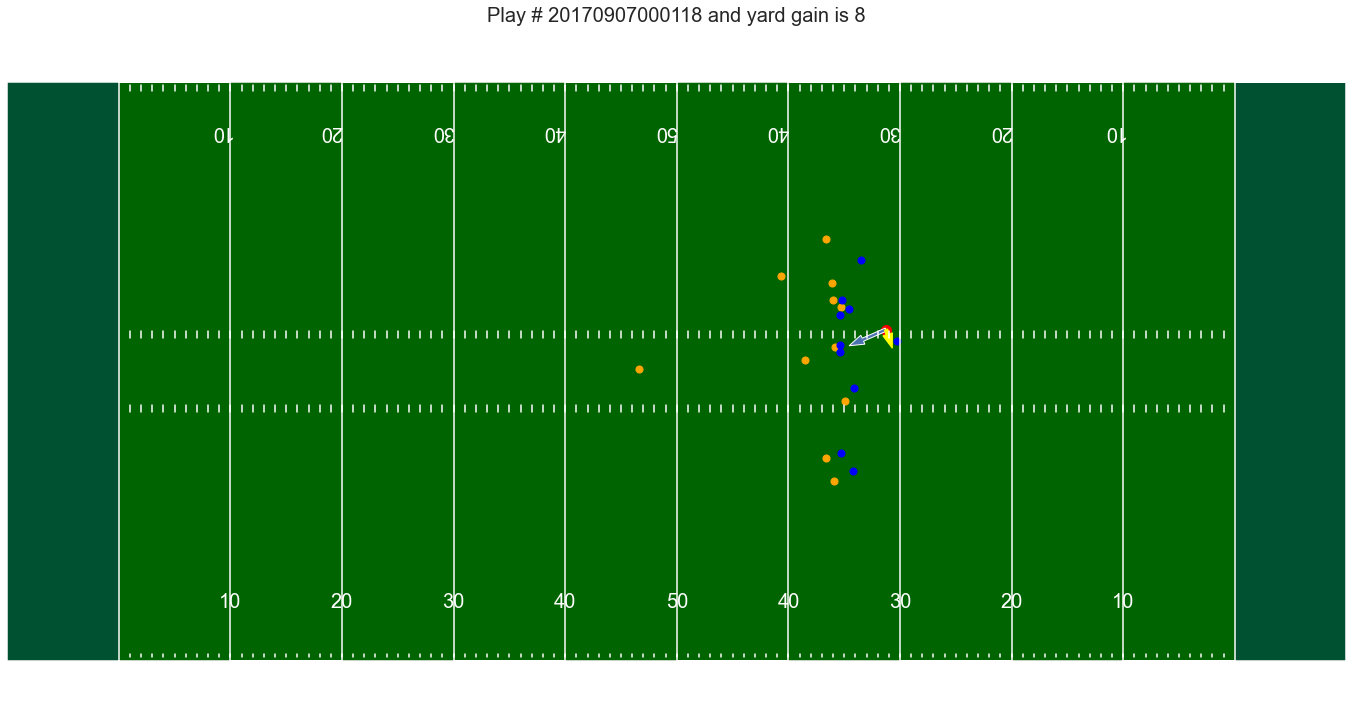

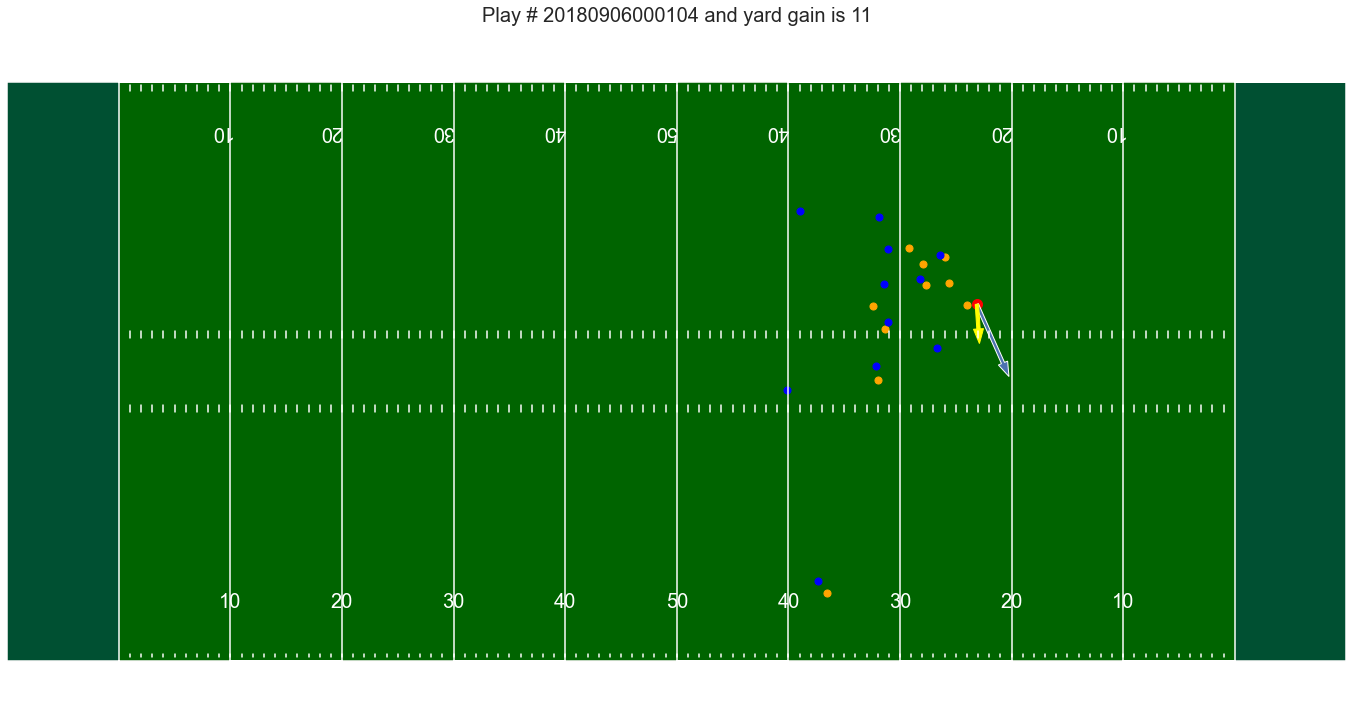

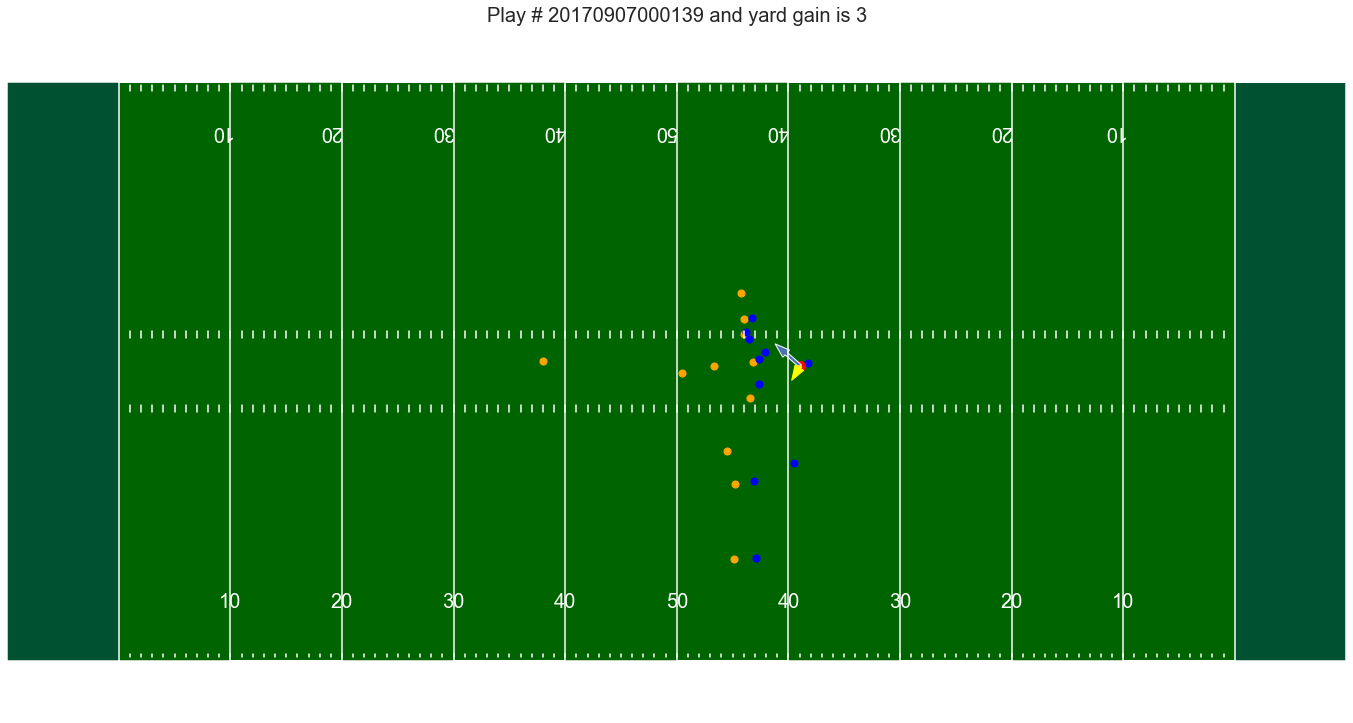

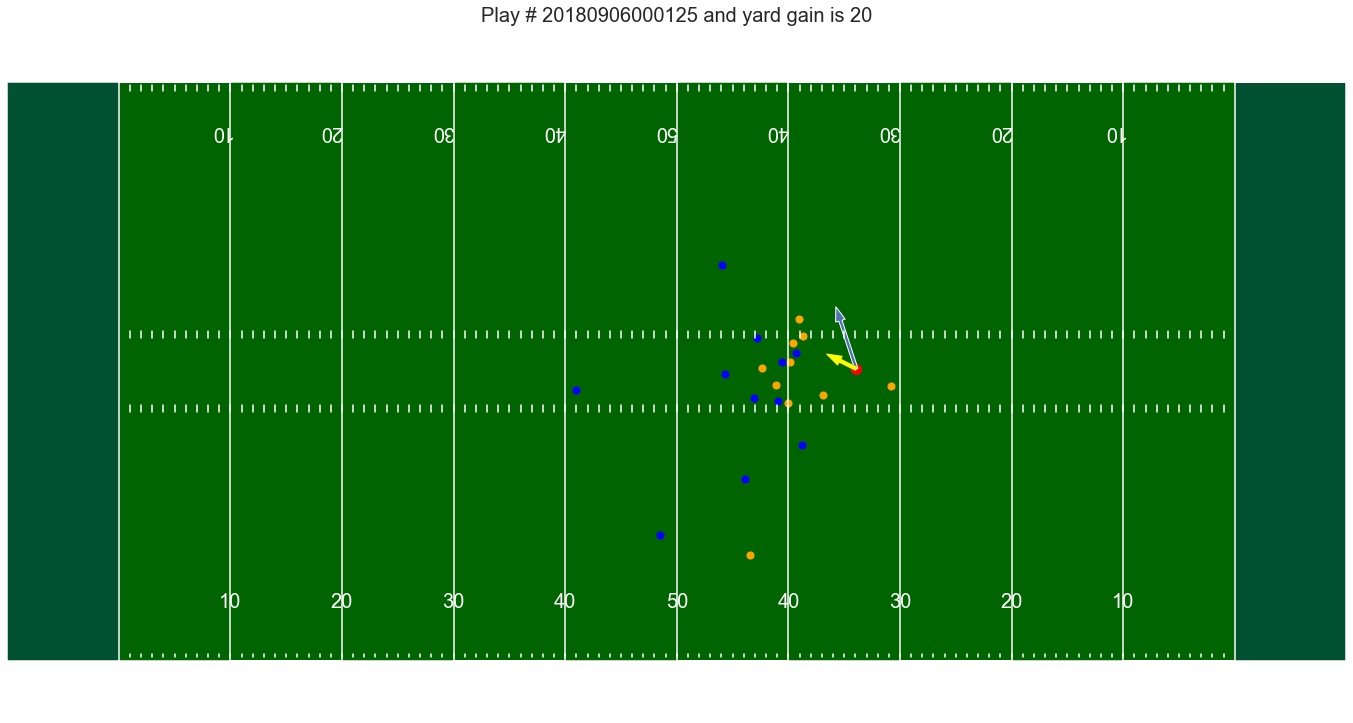

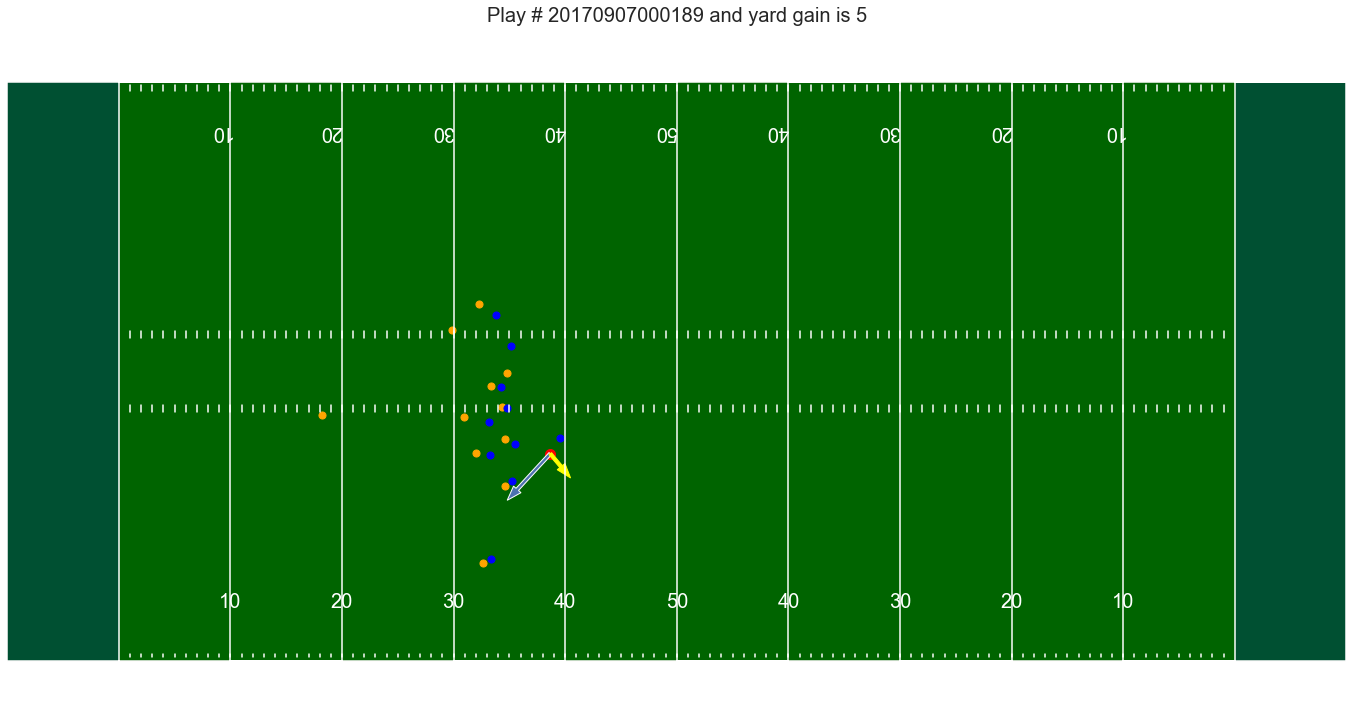

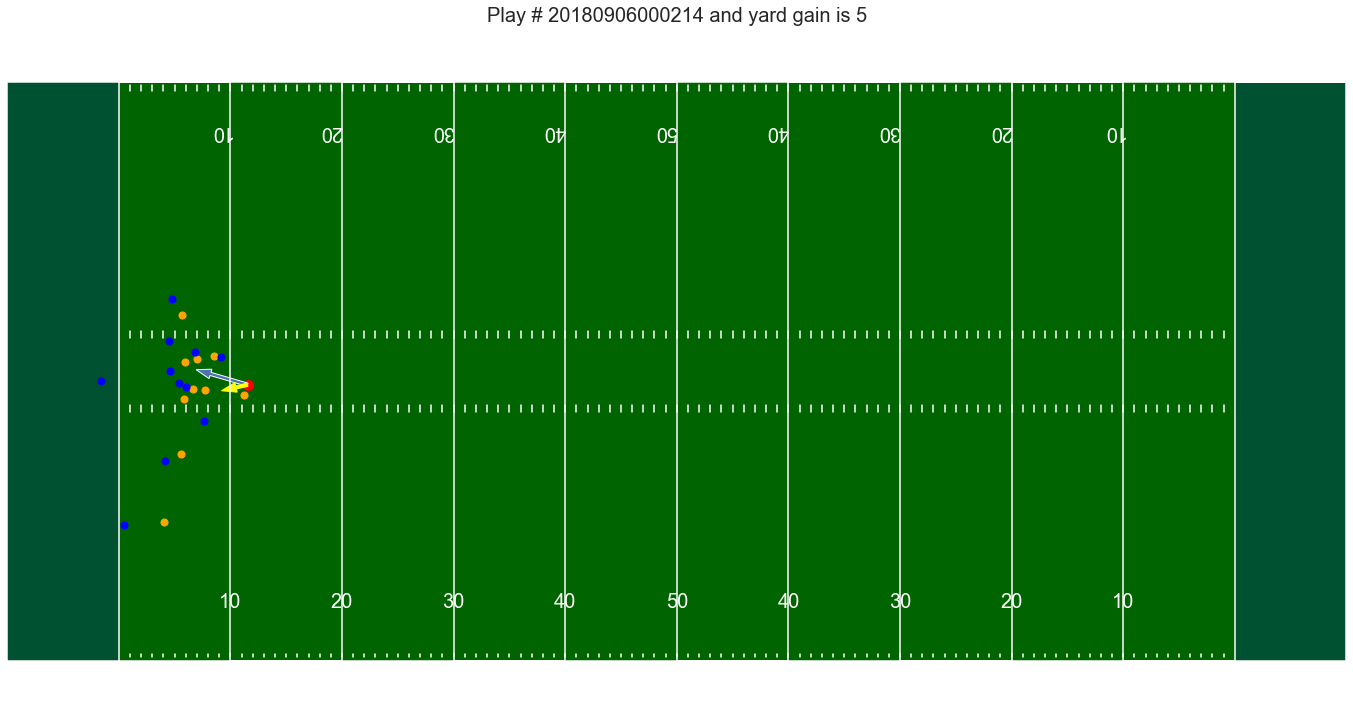

In [45]:
# Question 2 - Part C
for i in range(3):
    plot_play(play_id=plays_2017[i], train_df=data_raw)
    plot_play(play_id=plays_2018[i], train_df=data_raw)

"""
From what I can observe, it seems like the direction that the rusher is looking in is completely different from the direction 
that they are actually rushing. This does not seem to make much sense b/c most people are going to look where they are
running.
"""

In [50]:
x = data_raw[(data_raw['PlayId'] == 20180906000214) & (data_raw['Yards'] == 5)]
x['Y']

261844    24.54
261845    25.09
261846    27.58
261847    27.83
261848    31.88
261849    28.13
261850    25.45
261851    24.18
261852    24.96
261853    12.84
261854    19.07
261855    29.47
261856    28.02
261857    25.22
261858    28.45
261859    25.84
261860    26.75
261861    12.53
261862    33.34
261863    25.60
261864    18.47
261865    22.08
Name: Y, dtype: float64

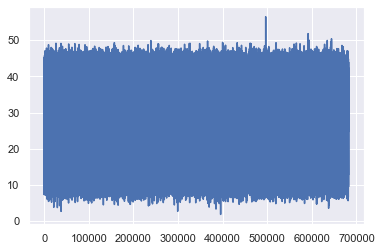

In [47]:
# Question 2 - Part D
y_coords = data_raw['Y']
plt.plot(y_coords)
plt.show()

"""
Y-coords seems to range from 10 - 47/48 from most plays. Few outliers above and beyond as shown in the graph below.
This makes a lot of sense to be because the yard markers on the football field range from 10 - 50. I am confused why
any values would be above 50. It makes sense that some values may be under 10 because there are yard measures from 0-10, 
but I noticed that after 50, it goes back to 40, 30, 20 and so on.
"""

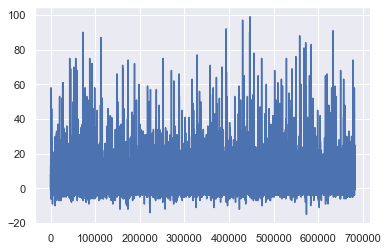

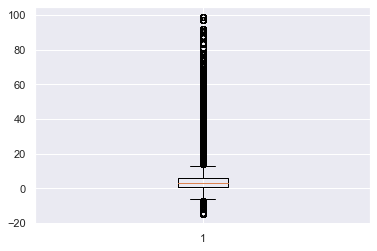

'\nThe mean is 4.227626 yards/play and the median is 3 yards/play. \n'

In [59]:
# Question 2- Part E
yards = data_raw['Yards']

plt.plot(yards)
plt.show()

plt.boxplot(yards)
plt.show()

yards.describe()

#print(yards.median()) # AKA 50% percentile

"""
The mean is 4.227626 yards/play and the median is 3 yards/play. The max yard gain is 99.000000. The min yard gain is -15. 
"""

In [63]:
# Question 2 - Part F
stadiums = data_raw['StadiumType']
types_stadiums = pd.unique(data_raw['StadiumType']).tolist() 
types_stadiums

['Outdoor',
 'Outdoors',
 'Indoors',
 'Retractable Roof',
 'Indoor',
 'Retr. Roof-Closed',
 'Open',
 nan,
 'Indoor, Open Roof',
 'Retr. Roof - Closed',
 'Outddors',
 'Dome',
 'Domed, closed',
 'Indoor, Roof Closed',
 'Retr. Roof Closed',
 'Outdoor Retr Roof-Open',
 'Closed Dome',
 'Oudoor',
 'Ourdoor',
 'Dome, closed',
 'Retr. Roof-Open',
 'Heinz Field',
 'Outdor',
 'Retr. Roof - Open',
 'Domed, Open',
 'Domed, open',
 'Cloudy',
 'Bowl',
 'Outside',
 'Domed',
 'Indoor, roof open',
 'indoor',
 'Retractable Roof - Closed',
 'OUTDOOR']

In [64]:
data_raw['StadiumType'].value_counts()

"""
Most common field type if outdoor, followed by outdoors (haha they are both the same thing).
"""

Outdoor                      362516
Outdoors                      92708
Indoors                       56826
Dome                          23122
Indoor                        19140
Retractable Roof              18766
Open                          11308
Retr. Roof-Closed             11044
Domed, closed                  6908
Retr. Roof - Closed            6446
Domed, open                    3696
Retr. Roof-Open                3014
Retractable Roof - Closed      2222
Closed Dome                    2134
Dome, closed                   1826
Domed                          1826
Domed, Open                    1760
OUTDOOR                        1254
Oudoor                         1188
indoor                         1166
Indoor, Roof Closed            1056
Retr. Roof Closed              1056
Outddors                        968
Bowl                            968
Heinz Field                     902
Retr. Roof - Open               880
Outdoor Retr Roof-Open          880
Indoor, Open Roof           

In [ ]:
# Question 2 - Part G